# Table of Contents
 <p><div class="lev2"><a href="#pandas-notes-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>pandas notes</a></div><div class="lev2"><a href="#環境準備-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>環境準備</a></div><div class="lev2"><a href="#データ準備のための準備-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>データ準備のための準備</a></div><div class="lev3"><a href="#[0,-1)-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>[0, 1)</a></div><div class="lev2"><a href="#正規分布？-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>正規分布？</a></div><div class="lev3"><a href="#カテゴリ変数化-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>カテゴリ変数化</a></div><div class="lev2"><a href="#quantile-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>quantile</a></div><div class="lev2"><a href="#基礎集計-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>基礎集計</a></div><div class="lev2"><a href="#正規化-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>正規化</a></div><div class="lev2"><a href="#累積構成比のための処理-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>累積構成比のための処理</a></div><div class="lev2"><a href="#分布-0.9"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>分布</a></div><div class="lev2"><a href="#formula式-0.10"><span class="toc-item-num">0.10&nbsp;&nbsp;</span>formula式</a></div>

## pandas notes
- pandasのメモ
- python3.5.1を使うようにする
- pandas 0.17.1を使うようにする

## 環境準備
```bash:anaconda_py3.5.1
pyenv install anaconda3-2.5.0
pyenv local anaconda3-2.5.0
```

In [50]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

## データ準備のための準備

In [25]:
nrow, ncol = 2, 3

### [0, 1)

In [26]:
np.random.rand(nrow, ncol)

array([[ 0.90160673,  0.50850989,  0.60819238],
       [ 0.03801823,  0.12838991,  0.05579081]])

## 正規分布？

In [27]:
np.random.randn(row_count, col_count)

array([[-0.41047876,  0.96353492, -0.52898658],
       [ 1.17824705, -0.44607617, -0.25503468]])

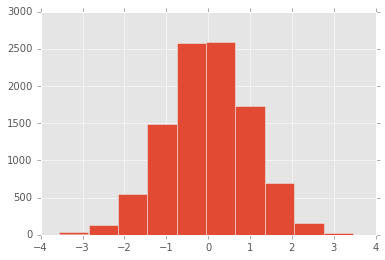

In [71]:
pd.Series(np.random.randn(1, 10000)[0], name="a").hist()

In [64]:
np.random.randn(1, 10000)

array([[ 1.01418904, -0.38533656,  2.02055062, ...,  1.58338601,
        -1.42410101,  0.16196371]])

In [28]:
np.random.randint(1, 100, 10)

array([ 8, 52, 30, 40, 42, 21, 34, 11, 77, 48])

In [80]:
import string

np.random.seed(0)
data = {
    "a": range(1, 1000+1),
    "b": list(string.ascii_letters[:25] * 40),
    "c": [1,2,3,4] * 250,
    "d": np.random.rand(1000),
    "e": np.random.randn(1000),
    "f": np.random.randint(1, 100, 1000)
}
df = pd.DataFrame(data)
df.head(5)

,a,b,c,d,e,f
0,1,a,1,0.548814,-0.101697,53
1,2,b,2,0.715189,0.019279,76
2,3,c,3,0.602763,1.849591,54
3,4,d,4,0.544883,-0.214167,94
4,5,e,1,0.423655,-0.499017,68


In [81]:
df["c"].head(1)

0    1
Name: c, dtype: int64

### カテゴリ変数化

In [82]:
df["c"] = df.c.astype("category")
df["c"].head(1)

0    1
Name: c, dtype: category
Categories (4, int64): [1, 2, 3, 4]

## quantile

In [32]:
df.quantile()

a    500.500000
d      0.481323
e      0.030935
f     51.000000
dtype: float64

In [33]:
decile = list(map(lambda x: x / 10, range(0, 10+1)))
decile

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [34]:
deciled = df.quantile(decile)
deciled

,a,d,e,f
0.0,1.0,0.000546,-2.994613,1
0.1,100.9,0.100287,-1.198404,9
0.2,200.8,0.203938,-0.825520,22
0.3,300.7,0.292981,-0.481149,33
0.4,400.6,0.383455,-0.199363,41
0.5,500.5,0.481323,0.030935,51
0.6,600.4,0.588486,0.245125,60
0.7,700.3,0.696379,0.501393,69
0.8,800.2,0.806419,0.835011,79
0.9,900.1,0.907747,1.324424,89


## 基礎集計
- 平均値
- 中央値
- plot moduleを試した

In [35]:
mean = pd.DataFrame(df.mean()).T
mean

,a,d,e,f
0,500.5,0.495922,0.029044,50.372


In [36]:
median = pd.DataFrame(df.median()).T
median

,a,d,e,f
0,500.5,0.481323,0.030935,51


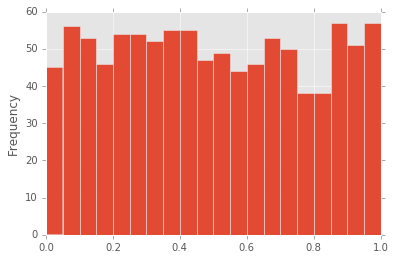

In [37]:
df["d"].plot(kind="hist", bins=20)

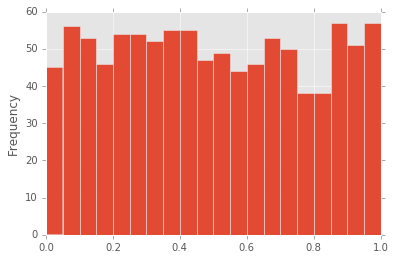

In [38]:
df["d"].plot.hist(bins=20)

## 正規化

(array([ 114.,   68.,   90.,  115.,  101.,  106.,  114.,   93.,  109.,   90.]),
 array([-1.76395676, -1.41382356, -1.06369036, -0.71355717, -0.36342397,
        -0.01329077,  0.33684243,  0.68697562,  1.03710882,  1.38724202,
         1.73737522]),
 <a list of 10 Patch objects>)

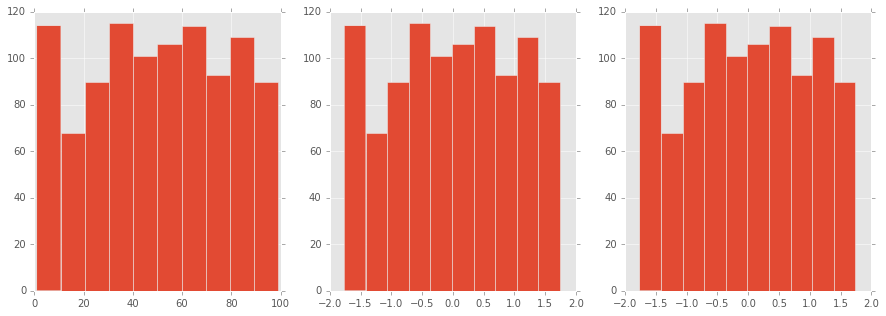

In [114]:
from sklearn.preprocessing import scale
# normalize はベクトルの正規化だった
figure, axes = plt.subplots(1, 3, figsize=(15, 5))
df["f"].hist(ax=axes[0])
(df.f - df.f.mean()).div(df.f.std()).hist(ax=axes[1])
plt.hist(scale(df["f"].astype("float")))

## 累積構成比のための処理

d    1
e    1
f    1
dtype: float64


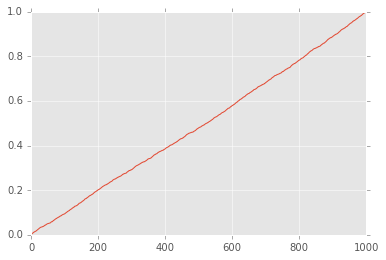

In [98]:
columns = list("def")
normalized_df = df[columns].div(df[columns].sum())
print(normalized_df.sum())
normalized_df["f"].cumsum().plot()


## 分布
http://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions

|name|arguments|
|----|---------|
|beta|(a, b[, size])|
|binomial|(n, p[, size])|
|chisquare|(df[, size])|
|dirichlet|(alpha[, size])|
|exponential|([scale, size])|
|f|(dfnum, dfden[, size])|
|gamma|(shape[, scale, size])|
|geometric|(p[, size])|
|gumbel|([loc, scale, size])|
|hypergeometric|(ngood, nbad, nsample[, size])|
|laplace|([loc, scale, size])|
|logistic|([loc, scale, size])|
|lognormal|([mean, sigma, size])|
|logseries|(p[, size])|
|multinomial|(n, pvals[, size])|
|multivariate_normal|(mean, cov[, size])|
|negative_binomial|(n, p[, size])|
|noncentral_chisquare|(df, nonc[, size])|
|noncentral_f|(dfnum, dfden, nonc[, size])|
|normal|([loc, scale, size])|
|pareto|(a[, size])|
|poisson|([lam, size])|
|power|(a[, size])|
|rayleigh|([scale, size])|
|standard_cauchy|([size])|
|standard_exponential|([size])|
|standard_gamma|(shape[, size])|
|standard_normal|([size])|
|standard_t|(df[, size])|
|triangular|(left, mode, right[, size])|
|uniform|([low, high, size])|
|vonmises|(mu, kappa[, size])|
|wald|(mean, scale[, size])|
|weibull|(a[, size])|
|zipf	|(a[, size])|


## formula式
- Rのあれ
- patsyというpydata提供のモジュール
- statsmodelsにformulaあったなぁと調べたら、これだった

In [152]:
import patsy 
patsy.dmatrices("c ~ .", df, return_type="dataframe")


SyntaxError: invalid syntax (<unknown>, line 1)

In [116]:
y, X = patsy.dmatrices("c ~ a + b + d + e + f", df, return_type="dataframe")
X.head()

,Intercept,b[T.b],b[T.c],b[T.d],b[T.e],b[T.f],b[T.g],b[T.h],b[T.i],b[T.j],...,b[T.t],b[T.u],b[T.v],b[T.w],b[T.x],b[T.y],a,d,e,f
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.548814,-0.101697,53
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0.715189,0.019279,76
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0.602763,1.849591,54
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0.544883,-0.214167,94
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5,0.423655,-0.499017,68


In [143]:
np.random.randint(0, 1+1, 50)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1])

In [156]:
df_ex = pd.DataFrame(
    {
        "a": np.random.randint(0, 3+1, 50),
        "b": range(50),
        "c": list("abcde") * 10,
        "d": [False, True] * 25,
        "y": np.random.randint(0, 1+1, 50)
    }
)
df_ex.describe()             

,a,b,d,y
count,50.000000,50.00000,50,50.000000
mean,1.460000,24.50000,0.5,0.520000
std,1.128662,14.57738,0.505076,0.504672
min,0.000000,0.00000,False,0.000000
25%,0.000000,12.25000,0,0.000000
50%,2.000000,24.50000,0.5,1.000000
75%,2.000000,36.75000,1,1.000000
max,3.000000,49.00000,True,1.000000


In [157]:
outcome, predictors = patsy.dmatrices("y ~ C(a) + b + c + d",  df_ex, return_type="dataframe")
pd.concat([predictors, outcome], axis=1).head()


,Intercept,C(a)[T.1],C(a)[T.2],C(a)[T.3],c[T.b],c[T.c],c[T.d],c[T.e],d[T.True],b,y
0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,1,1,0
2,1,0,1,0,0,1,0,0,0,2,1
3,1,0,1,0,0,0,1,0,1,3,1
4,1,1,0,0,0,0,0,1,0,4,0


In [142]:
X.describe()

,Intercept,C(a)[T.1],C(a)[T.2],C(a)[T.3],c[T.b],c[T.c],c[T.d],c[T.e],b
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,1,0.220000,0.200000,0.320000,0.200000,0.200000,0.200000,0.200000,24.50000
std,0,0.418452,0.404061,0.471212,0.404061,0.404061,0.404061,0.404061,14.57738
min,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.25000
50%,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.50000
75%,1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.75000
max,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.00000


In [158]:
y, X = patsy.dmatrices("c ~ a + C(b) + d + e + f", df, return_type="dataframe")
X.head()

,Intercept,C(b)[T.b],C(b)[T.c],C(b)[T.d],C(b)[T.e],C(b)[T.f],C(b)[T.g],C(b)[T.h],C(b)[T.i],C(b)[T.j],...,C(b)[T.t],C(b)[T.u],C(b)[T.v],C(b)[T.w],C(b)[T.x],C(b)[T.y],a,d,e,f
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.548814,-0.101697,53
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0.715189,0.019279,76
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0.602763,1.849591,54
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0.544883,-0.214167,94
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5,0.423655,-0.499017,68


In [159]:
y.head()

,c[1],c[2],c[3],c[4]
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [160]:
np.ravel(y), len(np.ravel(y))

(array([ 1.,  0.,  0., ...,  0.,  0.,  1.]), 4000)